# Exploratory data analysis

At your disposal is the data of the service Yandex. Apartments for sale in Saint-Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your task is to set the parameters. This will build an automated system: it will track anomalies and fraudulent activity 

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

## 1. Examining data from a file:

In [1]:
# import libraries: 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# Check for duplicates:
data.duplicated().sum()

0

In [4]:
# Check for NaN:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Conclusion:


    - Opened and reviewed the data, checked for duplicates. There are no duplicates. 
    - By the name of the columns there are no questions, everything is written correctly, clearly. 
    - There are many missing values, and the data type is not logically specified everywhere. 
    Let's start preprocessing

## 2. Data preprocessing

Everything is fine with these positions, we leave it as is
   - `total_images`
   - `total_area`
   - `floor`
   - `studio`
   - `open_plan`
   

**last_price :**

Let's bring `last_price` to an integer for the convenience of further calculations:

In [5]:
data.last_price = data.last_price.astype(int)

**first_day_exposition :**

In the `date` column, replace the data with `datetime`, removing the placement time:

In [6]:
data.first_day_exposition = pd.to_datetime(data.first_day_exposition, format= '%Y-%m-%d')

**rooms :**

In [7]:
data.rooms.value_counts().sort_index()

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

There is a certain number (less than 1%) where 0 `rooms` are indicated, we will delete these lines, there may be an error in the data.

In [8]:
data = data.query('rooms != 0')
data.rooms.isna().sum()

0

**ceiling_height :**

In [9]:
data.ceiling_height.value_counts()

2.50    3513
2.60    1637
2.70    1552
3.00    1109
2.80     979
        ... 
5.00       1
4.65       1
4.37       1
4.06       1
3.59       1
Name: ceiling_height, Length: 182, dtype: int64

In [10]:
data.ceiling_height.describe()

count    14422.000000
mean         2.769607
std          1.248101
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
data.ceiling_height.isna().sum()

9080

There are many missing values, replace them with the median value:

In [12]:
data.ceiling_height.fillna(data.ceiling_height.median(), inplace =True)

In [13]:
data.query('ceiling_height < 2 | ceiling_height > 6').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


There are only 31 rows (0.15%) where the ceiling height is below 2 meters or above 6 meters. Delete erroneous data

In [14]:
data = data[(data.ceiling_height >=2) & (data.ceiling_height <=6)]

**floors_total :**

In [15]:
data.floors_total.value_counts().sort_index()

1.0       25
2.0      380
3.0      661
4.0     1194
5.0     5769
6.0      910
7.0      589
8.0      388
9.0     3747
10.0    1168
11.0     200
12.0    1354
13.0     229
14.0     543
15.0     361
16.0    1355
17.0     814
18.0     492
19.0     330
20.0     265
21.0     151
22.0     282
23.0     346
24.0     453
25.0    1048
26.0     122
27.0     162
28.0      21
29.0       1
33.0       1
34.0       1
35.0      22
36.0       2
52.0       1
60.0       1
Name: floors_total, dtype: int64

In [16]:
data.floors_total.describe()

count    23388.00000
mean        10.62314
std          6.56650
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         60.00000
Name: floors_total, dtype: float64

In [17]:
data.floors_total.isna().sum()

83

There are only 83 rows (0.3%) with null data. Will delete these rows and convert to integer

In [18]:
data.floors_total = data.floors_total.fillna('0')

In [19]:
data = data.query('floors_total != 0')

In [20]:
data.floors_total = data.floors_total.astype(int)

**living_area :**

In [21]:
data.living_area.isna().sum()

1889

**kitchen_area :**

In [22]:
data.living_area.isna().sum()

1889

There are a large number of missing values in the columns with areas (about 8%), we will not get rid of such an amount of data, we will leave it as it is

**is_apartment :**

In [23]:
data.is_apartment.isna().sum()

20715

In the data column, apartments or not - almost 90% of missing values. Let's leave it as it is

**balcony :**

In [24]:
data.balcony.isna().sum() 

11436

There are a lot of missing values in the column with the number of balconies (~50%).
Suppose that if there is no balcony, then we simply skipped filling in this value.
Let's replace the missing values with "0". We will also convert the data to integer values,
as there can hardly be one and a half balconies.

In [25]:
data.loc[data['balcony'].isna(),'balcony'] = 0   # скорее всего их нет, так что заменим на 0
data.balcony = data.balcony.astype(int)

**locality_name :**

In [26]:
data.locality_name.isna().sum()

49

There are missing values in the location name column, replace them with 'unknown'

In [27]:
data.loc[data['locality_name'].isna(),'locality_name'] = 'unknown'

**days_exposition :**

In [28]:
data.days_exposition.isna().sum()

3161

There are missing values in the column with the number of days, replace them with '0' and convert them to an integer

In [29]:
data.days_exposition.fillna(0, inplace =True)
data.days_exposition = data.days_exposition.astype(int)



### Conclusion:


   - replaced missing values in the columns necessary for the task, 
   - deleted unnecessary rows

## 3. Calculations and adding results to the table:

Let's add a column with the cost per square meter:

In [30]:
data['price_meters'] = data['last_price'] / data['total_area']

Add columns with day, month and year of publication:

In [31]:
data['day_publication'] = data['first_day_exposition'].dt.day
data['month_publication'] = data['first_day_exposition'].dt.month
data['year_publication'] = data['first_day_exposition'].dt.year

Added a column with the floor category:

In [32]:
def floors_categoryze(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor == 1:
        return 'first floor'
    elif floor == floor_total:
        return 'last floor'
    else:
        return 'another floor'
    
data['floor_category'] = data.apply(floors_categoryze, axis = 1)

Added columns with the ratio of living area to total area and kitchen to total area:

In [33]:
data['ratio_living_total'] = data['living_area'] / data['total_area']
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']

### Conclusion:

   - Added new columns for future research.
   - We also applied categorization, divided the floors into categories.

## 4. Exploratory data analysis:

**total_area:**

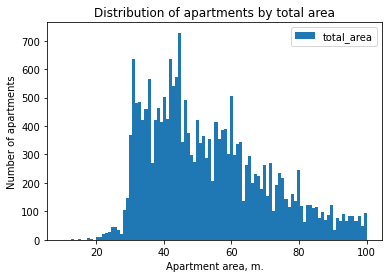

count    23471.000000
mean        60.619274
std         35.627239
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [34]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, range = (10,100))
plt.title('Distribution of apartments by total area')
plt.xlabel('Apartment area, m.')
plt.ylabel('Number of apartments')
plt.show()
data.total_area.describe()

We made a histogram for the total area, we see that the main part of the apartments is from 30 to 60 m2, while there are outliers up to 900 m2.

**last_price:**

In [35]:
data.last_price = round(data.last_price / 1000000, 2)

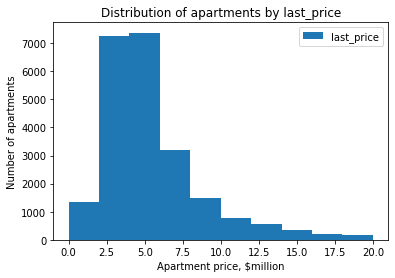

count    23471.000000
mean         6.570755
std         10.925442
min          0.010000
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

In [36]:
data.plot(y = 'last_price', kind = 'hist', range = (0,20))
plt.title('Distribution of apartments by last_price')
plt.xlabel('Apartment price, $million')
plt.ylabel('Number of apartments')
plt.show()
data.last_price.describe()

We got rid of the e-format of numbers, studied the cost of apartments. The main part is from 2.5 to 7.5 million.

**rooms:**

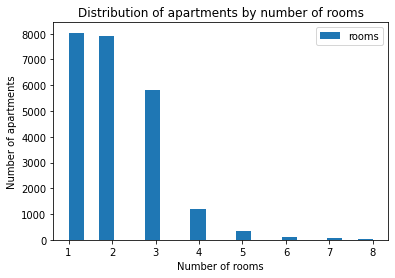

count    23471.000000
mean         2.088237
std          1.066359
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [37]:
data.plot(y = 'rooms', kind = 'hist', bins =20, range = (1,8))
plt.title('Distribution of apartments by number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Number of apartments')
plt.show()
data.rooms.describe()

We built a histogram by the number of rooms. We see that 1 and 2-room apartments are presented equally,
there are also a large number of 3k apartments.

**ceiling_height:**

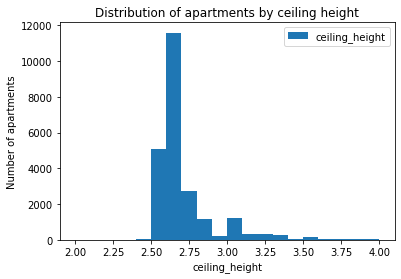

count    23471.000000
mean         2.088237
std          1.066359
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [38]:
data.plot(y = 'ceiling_height', kind = 'hist', bins =20, range = (2,4))
plt.title('Distribution of apartments by ceiling height')
plt.xlabel('ceiling_height')
plt.ylabel('Number of apartments')
plt.show()
data.rooms.describe()

According to the ceilings, as I wrote above, there are emissions of 0 and 100m. But in general, the main part of the data is ceilings from 2.5 to 3m which is normal.

**days_exposition:**

count    20310.000000
mean       181.554899
std        220.155266
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

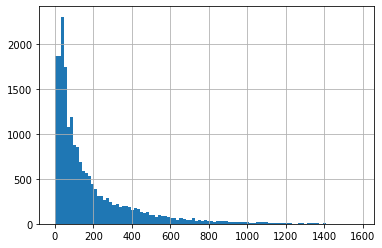

In [39]:
data.query('days_exposition != 0').days_exposition.hist(bins = 100, range = (0,1580))
data.query('days_exposition != 0').days_exposition.describe()


We investigate the time of sale of the apartment. Exclude data with 0 days.
Median - 96 days, mean twice as much - 181 days
The average is strongly influenced by data on apartments that have been sold for more than 2 years, the maximum value is 4.5 years

<AxesSubplot:>

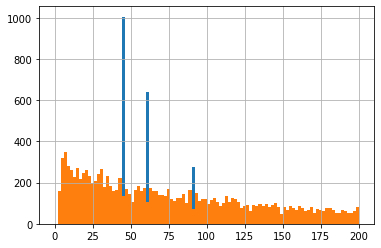

In [40]:
data.query('days_exposition != 0').days_exposition.hist(bins = 100, range = (0,200))
data.query('days_exposition != 0').days_exposition.value_counts()
error_data = [0,45,60,90]
data.query('days_exposition != @error_data').days_exposition.hist(bins = 100, range = (0,200))


By reducing the size of the histogram we will see outliers at 45,60,90 days.
By visiting the Yandex real estate website, we see that these days
ads are removed from publication automatically, we discard these values.

In [41]:
data.query('days_exposition != @error_data').days_exposition.describe()

count    18704.000000
mean       192.363398
std        226.128641
min          1.000000
25%         42.000000
50%        111.000000
75%        253.000000
max       1580.000000
Name: days_exposition, dtype: float64

Removed knockout values,we conclude that 50% of the apartments are sold within 3 months. Within a month - 25%, but there are also long sales, up to several years.

### Let's calculate how much the cost of an apartment depends on the following factors:

In [42]:
data[['price_meters','total_area','rooms','cityCenters_nearest']].corr()

,price_meters,total_area,rooms,cityCenters_nearest
price_meters,1.000000,0.305806,0.060121,-0.318063
total_area,0.305806,1.000000,0.760210,-0.232788
rooms,0.060121,0.760210,1.000000,-0.188816
cityCenters_nearest,-0.318063,-0.232788,-0.188816,1.000000


We looked at the correlation, we see that the cost practically does not depend on the number of rooms, and with an increase in the area, the cost per square meter increases but slightly. Also, the cost decreases with increasing distance from the city center, but again - slightly

### Let's calculate how much the cost of an apartment depends on floor:

<AxesSubplot:xlabel='floor_category'>

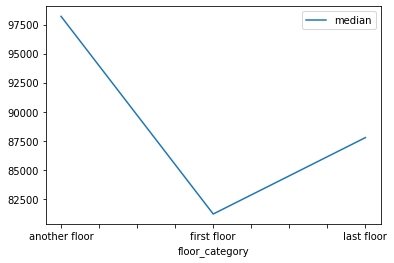

In [43]:
floor_corr = data.pivot_table(
    index = 'floor_category', values = 'price_meters', aggfunc = ['mean', 'count', 'median'])
floor_corr.columns = ['mean', 'count', 'median']
floor_corr.plot(y = 'median')

The lowest cost is for apartments on the first floor, a little higher - on the last. The most expensive apartments are those that are not on the first and last floor.

### Calculate how much the cost of the apartment depends on the date of placement:

In [44]:
data[['price_meters','day_publication', 'month_publication','year_publication']].corr()

,price_meters,day_publication,month_publication,year_publication
price_meters,1.000000,0.012201,-0.002472,0.007883
day_publication,0.012201,1.000000,-0.019175,-0.027035
month_publication,-0.002472,-0.019175,1.000000,-0.268318
year_publication,0.007883,-0.027035,-0.268318,1.000000


The cost of the apartment does not depend on the date of placement of the advertisement

### Calculate how much the cost of the apartment depends on the date of placement:

<AxesSubplot:xlabel='year_publication'>

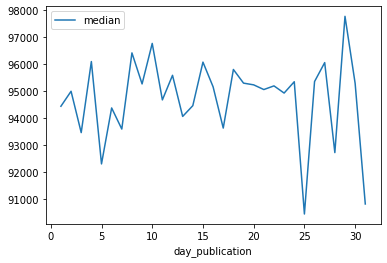

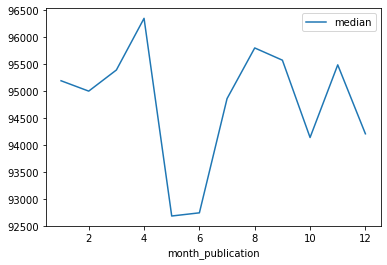

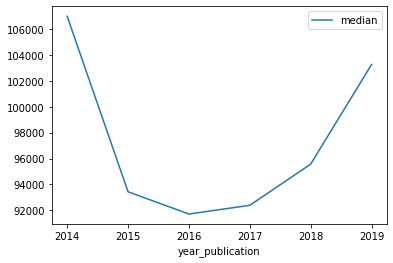

In [45]:
day_corr = data.pivot_table(
    index = 'day_publication', values = 'price_meters', aggfunc = ['mean', 'count', 'median'])
day_corr.columns = ['mean', 'count', 'median']

month_corr = data.pivot_table(
    index = 'month_publication', values = 'price_meters', aggfunc = ['mean', 'count', 'median'])
month_corr.columns = ['mean', 'count', 'median']

year_corr = data.pivot_table(
    index = 'year_publication', values = 'price_meters', aggfunc = ['mean', 'count', 'median'])
year_corr.columns = ['mean', 'count', 'median']

day_corr.plot(y = 'median')
month_corr.plot(y = 'median')
year_corr.plot(y = 'median')



We built graphs of the dependence of the cost of a meter on the day, month, year of publication:
   - From the day - practically does not depend.
   - From a month - in the may-june the cost of apartments falls.
   - From a year - Fall in value since 2014, which corresponds to: the fall in oil prices and the ruble, anti-Russian economic sanctions, the introduction of counter-sanctions. https://realty.rbc.ru/news/5b76c9fb9a79471f1c1c81db


    


### Let's choose 10 settlements with the largest number of ads:

In [46]:
local_pt = data.pivot_table(index = 'locality_name', values = 'price_meters', aggfunc=['count', 'mean'])
local_pt.columns = ['count', 'mean_price']
local_pt.sort_values('count', ascending = False).head(10)

,count,mean_price
locality_name,,
Санкт-Петербург,15592,114769.940736
посёлок Мурино,494,85071.279587
посёлок Шушары,436,78405.738420
Всеволожск,392,68618.013712
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,323,90289.778393
Гатчина,306,68757.678644
деревня Кудрово,283,92297.218847


### Let's highlight the settlements with the highest and lowest cost per square meter:

In [47]:
max_price = local_pt[local_pt['mean_price'] == local_pt['mean_price'].max()]
min_price = local_pt[local_pt['mean_price'] == local_pt['mean_price'].min()]
print(max_price)
print(min_price)

                   count     mean_price
locality_name                          
посёлок Лисий Нос      2  121616.221359
                    count    mean_price
locality_name                          
деревня Старополье      3  11206.221198


### Select apartments in St. Petersburg, and add a column with the distance to the center in km (initially data in meters), fill empty values with median and convert to integer:

In [48]:
piter_data = data.query('locality_name == "Санкт-Петербург"')

In [49]:
piter_data['center_km'] = piter_data.cityCenters_nearest / 1000

<ipython-input-49-31774da1f3b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piter_data['center_km'] = piter_data.cityCenters_nearest / 1000


In [50]:
piter_data.center_km.fillna(piter_data.center_km.median(), inplace =True)
piter_data.center_km = piter_data.center_km.astype(int)
piter_data

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meters,day_publication,month_publication,year_publication,floor_category,ratio_living_total,ratio_kitchen_total,center_km
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,755.0,0,120370.370370,7,3,2019,another floor,0.472222,0.231481,16
2,10,5.20,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,574.0,558,92785.714286,20,8,2015,another floor,0.612500,0.148214,13
3,0,64.90,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,234.0,424,408176.100629,24,7,2015,another floor,NaN,NaN,6
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,48.0,121,100000.000000,19,6,2018,another floor,0.320000,0.410000,8
7,5,7.92,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,NaN,0,110544.692737,18,4,2019,another floor,NaN,0.263966,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3.55,35.30,2018-02-28,1,2.86,15,16.3,4,NaN,...,652.0,29,100566.572238,28,2,2018,another floor,0.461756,0.257790,16
23690,3,5.50,52.00,2018-07-19,2,2.65,5,31.0,2,NaN,...,NaN,15,105769.230769,19,7,2018,another floor,0.596154,0.115385,6
23691,11,9.47,72.90,2016-10-13,2,2.75,25,40.3,7,NaN,...,806.0,519,129903.978052,13,10,2016,another floor,0.552812,0.145405,4
23694,9,9.70,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,381.0,0,72490.845228,21,3,2017,another floor,0.547792,0.103356,4


<AxesSubplot:xlabel='center_km'>

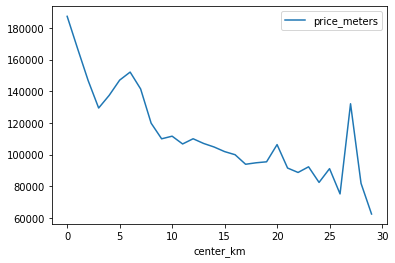

In [51]:
# Построим график зависимости стоимости от удаленности от центра.
price_from_loc = piter_data.pivot_table(index = 'center_km', values = 'price_meters')
price_from_loc.plot()


We found out that a sharp change in the cost of apartments is in the region of 3 and 7 km. Let's leave 7 km, it is quite possible that 3 km is a certain area in which the cost falls for other reasons.

### Let's make a new dataframe for the central part of the cityand we will carry out for it the same studies that we did for the general dataframe:

In [52]:
piter_centre = piter_data.query('center_km <= 7')

**Correlation of cost dependence on the following factors:**

In [54]:
piter_centre[['price_meters','total_area','rooms','cityCenters_nearest']].corr()

,price_meters,total_area,rooms,cityCenters_nearest
price_meters,1.000000,0.252126,0.006358,-0.031502
total_area,0.252126,1.000000,0.741958,-0.106139
rooms,0.006358,0.741958,1.000000,-0.176644
cityCenters_nearest,-0.031502,-0.106139,-0.176644,1.000000


The dependence of the cost on the area of the apartment has slightly decreased, but in general the data is the same as in the general dataset

**Dependence of the cost of an apartment in the center on the floor:**

<AxesSubplot:xlabel='floor_category'>

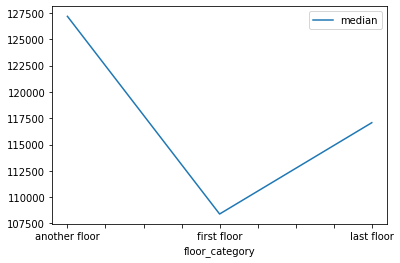

In [56]:
piter_floor_corr = piter_centre.pivot_table(
    index = 'floor_category', values = 'price_meters', aggfunc = ['mean', 'count', 'median'])
piter_floor_corr.columns = ['mean', 'count', 'median']
piter_floor_corr.plot(y = 'median')

Dependence of cost on a floor - without changes.

**The dependence of the cost of an apartment in the center on the time of publication:**

<AxesSubplot:xlabel='year_publication'>

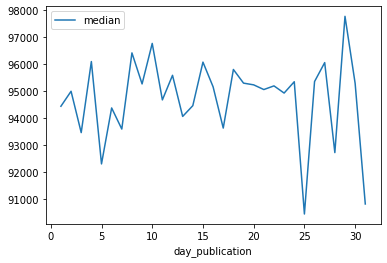

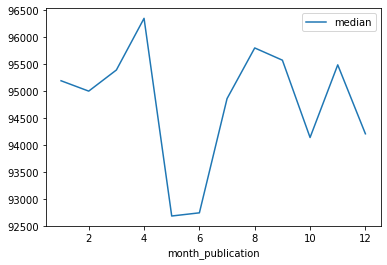

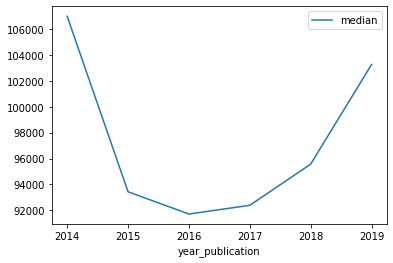

In [58]:
piter_center_day_corr = piter_centre.pivot_table(
    index = 'day_publication', values = 'price_meters', aggfunc = ['mean', 'count', 'median'])
piter_center_day_corr.columns = ['mean', 'count', 'median']

month_corr = data.pivot_table(
    index = 'month_publication', values = 'price_meters', aggfunc = ['mean', 'count', 'median'])
month_corr.columns = ['mean', 'count', 'median']

year_corr = data.pivot_table(
    index = 'year_publication', values = 'price_meters', aggfunc = ['mean', 'count', 'median'])
year_corr.columns = ['mean', 'count', 'median']

day_corr.plot(y = 'median')
month_corr.plot(y = 'median')
year_corr.plot(y = 'median')

Without changes.

# General conclusion:

In this project, we first viewed and processed the original dataset:
 - removed missing values where necessary,
 - replaced data types with the ones necessary for convenient work.
 - calculated and added to the table the price per square meter of housing,
 - converted date to days, months and years
 - created a new category for the floors of apartments.

Studied outliers (anomalies), in the table, processed them.
We concluded that the cost per square meter is mainly affected by the number of storeys, the number of rooms, and the distance from the center. Placement time has little effect.

Separately, the center of St. Petersburg was singled out in order to compare the values for it with the general table. It was found that there are practically no differences.

*For the study, data from "Yandex Practicum" were used.